# Lab 3

## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Dataset

In [7]:
df = pd.read_csv("./sample_data/Data_Cortex_Nuclear.csv", sep=',')

### First 5 Rows

In [8]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


## Cleaning Dataset

### Feature Reduction

In [9]:
df_proteins = df.iloc[:, 1:-4]

print(df_proteins.shape)
df_proteins.head()

(1080, 77)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


### Missing Values

In [10]:
pd.set_option('display.max_rows', 78)
missing_counts = df_proteins.isnull().sum()
print(missing_counts)

DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N             3
NUMB_N     

### Mean Imputation

In [11]:
df_proteins.fillna(df_proteins.mean(), inplace=True)

### PCA Normalization

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_proteins)

#### Dimensions

In [13]:
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(data_scaled)

pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(data_scaled)

### Visualize

#### 2D Plot

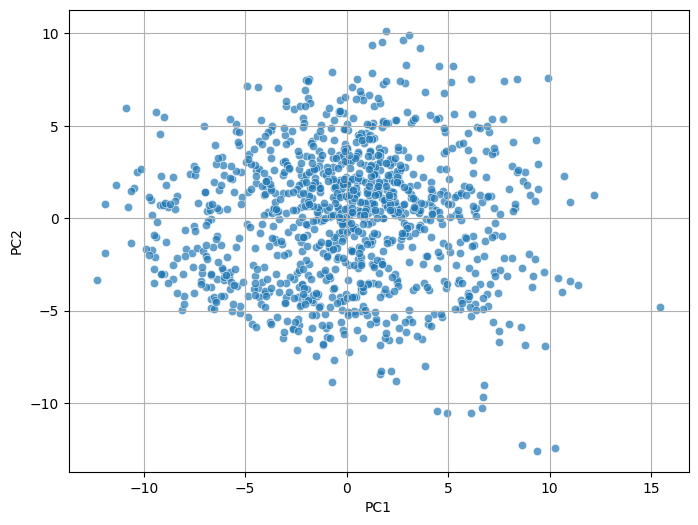

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components_2d[:, 0], y=components_2d[:, 1], alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

#### 3D Plot

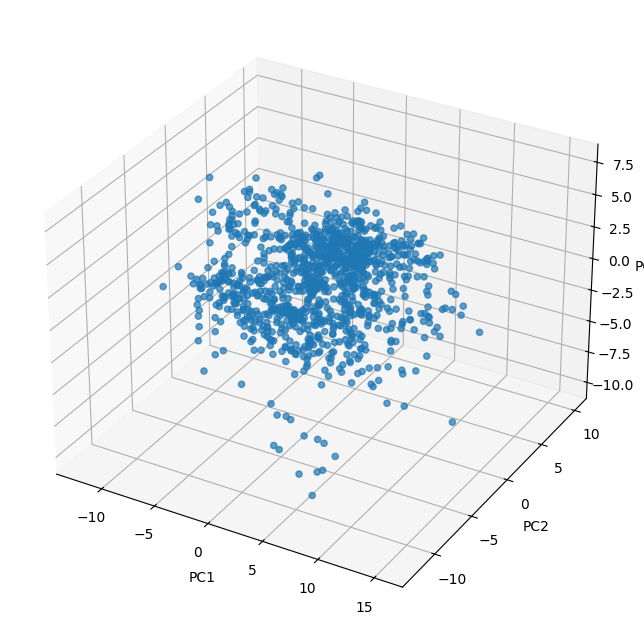

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2], alpha=0.7)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

## Clustering

### Gaussian Mixture Models (GMM)

GMM претпоставува дека секој кластер следи нормална распределба и пресметува веројатност дека некој примерок припаѓа на одреден кластер. Ова е корисно за податочното множество, каде што кластерите може да бидат со различни форми и големини, а не секогаш строго одделени.

In [16]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

df_gmm = df_proteins.copy()
df_gmm['Cluster'] = gmm_labels

### K-Means

K-Means се користи затоа што е едноставен и брз алгоритам кој добро работи кога кластерите се јасно одвоени и приближно кружни по форма. Тој пробува да ги подели примероците во групи (кластери) така што секој примерок ќе биде најблизу до еден "центар" на кластер

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

df_kmeans = df_proteins.copy()
df_kmeans['Cluster'] = kmeans_labels

## Visualization

### Gaussian Mixture Models (GMM)

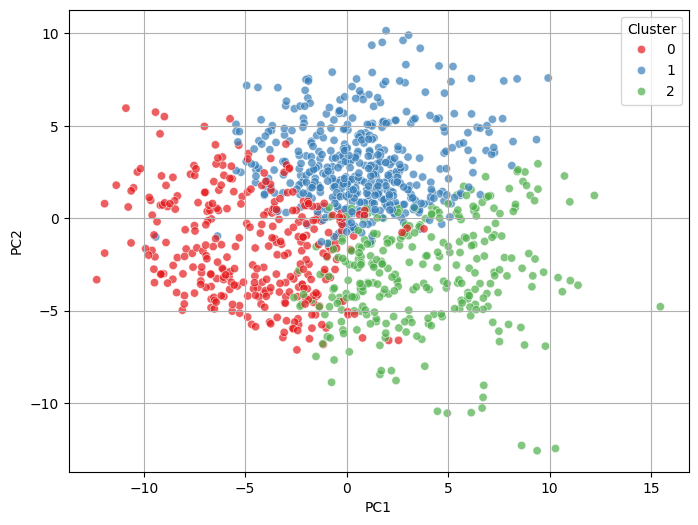

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=components_2d[:, 0],
    y=components_2d[:, 1],
    hue=gmm_labels,
    palette='Set1',
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Mожеме да забележиме дека кластерите се добро распоредени и преклопувањето е минимално, што значи дека моделот нашол сосема природни групи во податоците. Ова е корисно за овој тип податочно множество бидејќи GMM дозволува кластерите да имаат различни форми и големини, што е реално кај биолошки податоци како овие.

### K-Means

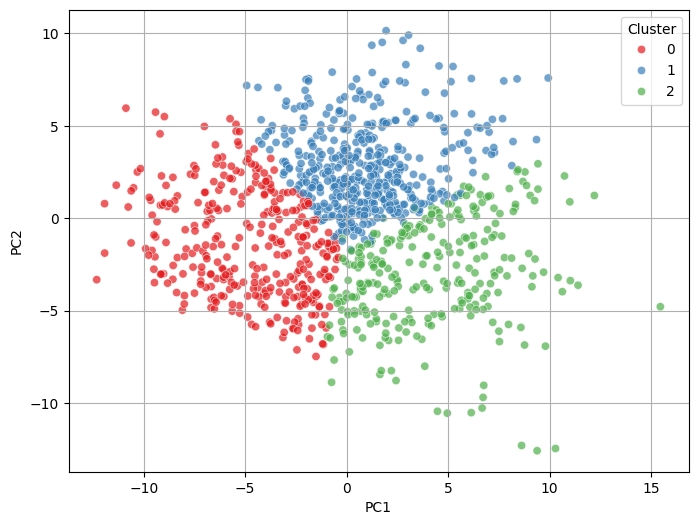

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=components_2d[:, 0],
    y=components_2d[:, 1],
    hue=kmeans_labels,
    palette='Set1',
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

И овде секоја боја претставува различен кластер. Може да се забележи дека, исто како во GMM, кластерите се добро дефинирани и не се преклопуваат многу, што значи дека K-Means успеал да открие логичка поделба помеѓу примероците. Затоа, K-Means е исто така соодветен избор за оваа анализа.

## Conclusion

Ова податочно множество е **Mice Protein Expression**, кое содржи мерења на 77 различни протеини кај мозоци од глувци. Со PCA се намалува бројот на димензии за да можеме визуелно да го прикажеме податочното множество во 2D и 3D. Овие визуализации се корисни за да видиме дали постојат природни групи во податоците. PC1, PC2 и PC3 ни помагаат да ја прикажеме комплексната структура на податоците во 2 или 3 димензии, така што можеме полесно да видиме кластери, шаблони или групи. Откако се искористат кластеринг алгоритмите, видовме дека податоците се делат на три групи, што укажува дека има скриена структура во протеинските експресии која може да се користи за понатамошна анализа или класификација.

Графиците покажуваат слична поделба на податоците во три групи, но GMM дозволува поголема флексибилност во формата и границите на кластерите, додека K-Means дели по права линија околу центри. GMM изгледа малку поприродно во распоредот на кластерите, но и двата модели добро ја завршуваат работата. Избравме овие два затоа што се меѓу најкористените и најефективните методи за вакви ситуации.